# Plotting left vs right hand CNRs

Plotting for subs 2 & 5, for each TR (700, 1510, 1920)

This code will plot a sliced T1 so that the CNR values observed across a few of the ROIs can be seen for each contrast.

The contrasts depicted are:
+ main effect of target side (left vs right)
+ main effect of cue probability (p=.5 vs p=.8)
+ target side x probability interaction
+ absolute value contrast (highest value display vs lowest value display)
+ relative value contrast (low/high left/right vf vs high/low left/right vf)
+ hand of response (left hand vs right hand) - task was: is the gabor oriented clockwise or counterclockwise

In [19]:
import matplotlib.pyplot as plt
import nilearn.plotting as niplt # for debugging
import nilearn.image as img
import pandas as pd
import nibabel as nib
import os

In [54]:
# define subject paths and variables for the session
Basedir =  "/scratch/qbi/uqkgarn1/"
CNR = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-%s/TR%s/THRSH/thr%s_spmT_00%s.nii.gz'
t = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-%s/TR%s/FLGLM/spmT_00%s.nii.gz'
T1 = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-%s/anat/sub-%s_desc-masked_T1w.nii.gz'
mask = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-%s/TR%s/MASKS/r%s_trans.nii.gz'
mv = 10 # maximum value when plotting
subs = ['02', '05'] # subject numbers to be plotted
sub_coords = [[28,22,-20],[-14, 43, 7]] # coordinates to slice image
figsz = [12, 12] # fig size in inches
nrow = 3 # for subplots
ncol = 1

In [21]:
CNR % ('02', '700', 'CN', '01')

'/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-02/TR700/THRSH/thrCN_spmT_0001.nii.gz'

In [22]:
def plotCNR(CNR, T1, sub, TR, contrast, coords, maxval, axes=None):
    stats = CNR % (sub, TR, contrast)
    T1 = T1 % (sub, sub)
    return niplt.plot_stat_map(stat_map_img=stats, 
                               bg_img=T1, 
                               cut_coords=coords, 
                               colorbar=True, 
                               axes=axes,
                               annotate=True,
                               symmetric_cbar=True,
                               draw_cross=False,
                               title= 'sub %s, TR %s' % (sub, TR),
                               vmax = maxval) 

In [128]:
stats = CNR % ('03', '700', 'Put', '02')
T1im = T1 % ('03', '03')
#stats = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-03/TR700/THRSH/spmT_0001_maths_abs.nii.gz'

In [129]:
stats

'/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-03/TR700/THRSH/thrPut_spmT_0002.nii.gz'

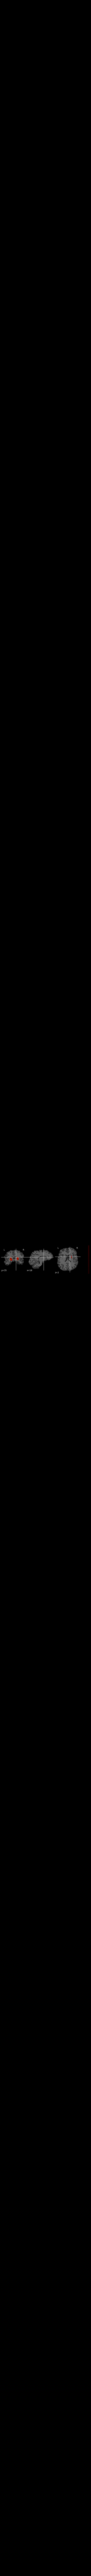

In [131]:
niplt.plot_stat_map(stat_map_img=stats, 
                    bg_img=T1im, cut_coords=[18, 35, 2], colorbar = True)

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/find_cuts.py:63: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  .format(DEFAULT_CUT_COORDS))


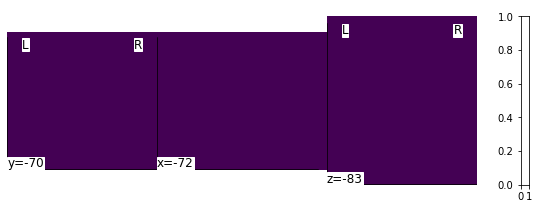

In [99]:
niplt.plot_img(stats, colorbar=True)

In [44]:
this_msk = mask % ('03', '700', 'CN')
T1im = T1 % ('03', '03')


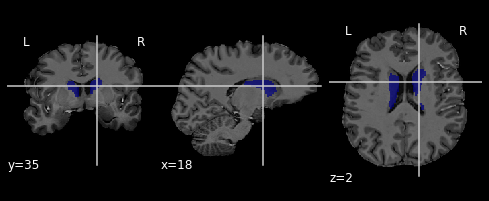

In [45]:
niplt.plot_roi(this_msk, T1im)

## Main effect of Target Side (left vs right)

In [ ]:

fa, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[0], '700', 'FEF', '1', sub_coords[0], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[0], '1510', 'FEF', '1', sub_coords[0], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[0], '1920', 'FEF', '1', sub_coords[0], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_tgtLvsR.pdf.pdf' % subs[0]
fa.savefig(fname = savename, facecolor='k', edgecolor='k')

In [ ]:
fb, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[1], '700', '1', sub_coords[1], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[1], '1510', '1', sub_coords[1], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[1], '1920', '1', sub_coords[1], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_tgtLvsR.pdf.pdf' % subs[1]
fb.savefig(fname = savename, facecolor='k', edgecolor='k')

## Main effect of cue probability (p=.5 vs p=.8)

In [ ]:
fc, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[0], '700', '2', sub_coords[0], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[0], '1510', '2', sub_coords[0], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[0], '1920', '2', sub_coords[0], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_MEP.pdf' % subs[0]
fc.savefig(fname = savename, facecolor='k', edgecolor='k')

In [ ]:
fd, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[1], '700', '2', sub_coords[1], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[1], '1510', '2', sub_coords[1], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[1], '1920', '2', sub_coords[1], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_MEP.pdf' % subs[1]
fd.savefig(fname = savename, facecolor='k', edgecolor='k')

# tgt side x p interaction

In [ ]:
fe, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[0], '700', '3', sub_coords[0], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[0], '1510', '3', sub_coords[0], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[0], '1920', '3', sub_coords[0], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_tgtSidexpCue.pdf' % subs[0]
fe.savefig(fname = savename, facecolor='k', edgecolor='k')

In [ ]:
ff, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[1], '700', '3', sub_coords[1], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[1], '1510', '3', sub_coords[1], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[1], '1920', '3', sub_coords[1], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_tgtSidexpCue.pdf' % subs[1]
ff.savefig(fname = savename, facecolor='k', edgecolor='k')

# Absolute value (high display vs low display)

In [ ]:
fg, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[0], '700', '5', sub_coords[0], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[0], '1510', '5', sub_coords[0], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[0], '1920', '5', sub_coords[0], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_AbsVal.pdf' % subs[0]
fg.savefig(fname = savename, facecolor='k', edgecolor='k')

In [ ]:
fh, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[1], '700', '5', sub_coords[1], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[1], '1510', '5', sub_coords[1], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[1], '1920', '5', sub_coords[1], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_AbsVal.pdf' % subs[1]
fh.savefig(fname = savename, facecolor='k', edgecolor='k')

# Relative value (l/h - h/l)

In [ ]:
fi, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[0], '700', '6', sub_coords[0], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[0], '1510', '6', sub_coords[0], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[0], '1920', '6', sub_coords[0], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_RelVal.pdf' % subs[0]
fi.savefig(fname = savename, facecolor='k', edgecolor='k')

In [ ]:
fj, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[1], '700', '6', sub_coords[1], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[1], '1510', '6', sub_coords[1], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[1], '1920', '6', sub_coords[1], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_RelVal.pdf' % subs[1]
fj.savefig(fname = savename, facecolor='k', edgecolor='k')

# Left - Right hand

In [ ]:
fk, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[0], '700', '9', sub_coords[0], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[0], '1510', '9', sub_coords[0], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[0], '1920', '9', sub_coords[0], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_lefthand-m-righthand.pdf' % subs[0]
fk.savefig(fname = savename, facecolor='k', edgecolor='k')

In [ ]:
fl, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotCNR(CNR, T1, subs[1], '700', '9', sub_coords[1], maxval=mv, axes=ax1)
plotCNR(CNR, T1, subs[1], '1510', '9', sub_coords[1], maxval=mv, axes=ax2)
plotCNR(CNR, T1, subs[1], '1920', '9', sub_coords[1], maxval=mv, axes=ax3)

In [ ]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/out/sub-%s_lefthand-m-righthand.pdf' % subs[1]
fl.savefig(fname = savename, facecolor='k', edgecolor='k')